In [9]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Problem 1

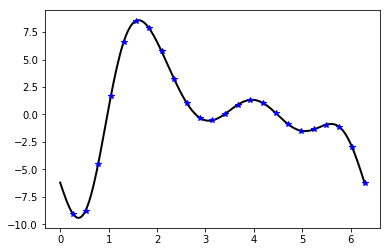

In [2]:
N = 24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))
k = np.concatenate((np.arange(0,N/2),np.array([0]),np.arange(-N/2+1,0,1)))

f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. - np.sin(x2)**3 + 2*np.cos(x2+1)*np.exp(2*np.sin(x2+1)))
der = (2.*np.sin(x1)*np.cos(x1)**2. - np.sin(x1)**3 + 2*np.cos(x1+1)*np.exp(2*np.sin(x1+1)))
f_hat1 = fft(der)
fp_hat1 = ((1j*k)*f_hat1)
fp1 = np.real(ifft(fp_hat1))

sec_deriv = (2.*np.cos(x2)**3 - 4.*np.sin(x2)**2*np.cos(x2)) - 3*np.sin(x2)**2*np.cos(x2) + np.exp(2*np.sin(x2+1))*(4*np.cos(x2+1)**2 - 2*np.sin(x2+1))
result = 1./2*sec_deriv - derivative
f_res = 1./2*fp1 - fp
plt.plot(x2,result,'-k',linewidth=2.)
plt.plot(x1,f_res,'*b')
plt.savefig('spectral2_derivative.pdf')
plt.show()

### Problem 2

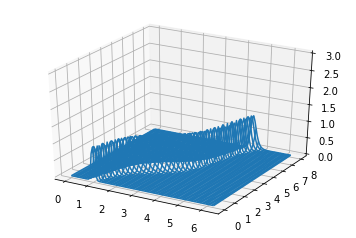

In [17]:
t_steps = 150    # Time steps
x_steps = 100     # x steps
k = np.concatenate((np.arange(0,x_steps/2),np.array([0]),np.arange(-x_steps/2+1,0,1)))

t_domain = np.linspace(0,8,t_steps)
x_domain = np.linspace(0,2*np.pi,x_steps)
c = lambda x : .2 + np.sin(x-1)**2
t0 = lambda x : np.exp(-100*(x-1)**2)
y0 = t0(x_domain)
ode = lambda u,t : np.real(-c(x_domain)*ifft((1j*k)*fft(u)))

sol = odeint(ode,y0,t_domain)
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.show()